In [1]:
## Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV

In [2]:
## reading data
data = pd.read_csv('telecom_churn_data.csv')
data.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [3]:
## shape of the data
data.shape

(99999, 226)

DATA Prepration AND EDA

In [4]:
## missing values identification
((data.isnull().sum()/data.shape[0])*100).round(2).sort_values(ascending=False)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

In [5]:
data.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
##In the above dataframe we can see circle_id have only one unique value and these columns gives no variance and do not contribute anything to our target varibale .
## Let's find out this kind of columns and drop them from our dataset.

single_unqiue_cols = []

for col in data.columns:
    if data[f'{col}'].nunique() ==1:
        single_unqiue_cols.append(col)
single_unqiue_cols

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [7]:
data.drop(single_unqiue_cols,axis=1,inplace = True)
data.shape

(99999, 210)

In [8]:
## let's drop the column mobile number column as it does not give any contribution 
data.drop('mobile_number',axis = 1, inplace = True)

In [9]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 209 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    arpu_6                    float64
 1    arpu_7                    float64
 2    arpu_8                    float64
 3    arpu_9                    float64
 4    onnet_mou_6               float64
 5    onnet_mou_7               float64
 6    onnet_mou_8               float64
 7    onnet_mou_9               float64
 8    offnet_mou_6              float64
 9    offnet_mou_7              float64
 10   offnet_mou_8              float64
 11   offnet_mou_9              float64
 12   roam_ic_mou_6             float64
 13   roam_ic_mou_7             float64
 14   roam_ic_mou_8             float64
 15   roam_ic_mou_9             float64
 16   roam_og_mou_6             float64
 17   roam_og_mou_7             float64
 18   roam_og_mou_8             float64
 19   roam_og_mou_9             float64
 20   loc_

In [10]:
## from the above cell we can see that the columns which are related to date have datatype object 
## let's update the datatype of these date columns

date_cols = data.select_dtypes(include = ['object'])

for i in date_cols.columns:
    data[i] = pd.to_datetime(data[i])
    


In [11]:
## Now lets's fetch the columns and create a lsit of columns to perfrom analysis on them

columns = data.columns.tolist()


### HIGH VALUE CUSTOMER:

As mentioned the document we will look into the high value customers. High values customers are the customers who have recharged an amount more than to equal to 70 percentile of the recharge amount in first 2 months.


In [12]:
## fetching all the columns with keyword rech (recharge)

recharge_columns = [col for col in columns if 'rech' in col]
recharge_columns


['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [13]:
## we acn see columns of total amount of recharge in our dataset, but it does not include the numbers , in the below piece of code we are generating the amount/numbers for 6,7,8,9 months. 
data['total_data_rech_amt_6'] = data['av_rech_amt_data_6'] * data['total_rech_data_6']
data['total_data_rech_amt_7'] = data['av_rech_amt_data_7'] * data['total_rech_data_7']
data['total_data_rech_amt_8'] = data['av_rech_amt_data_8'] * data['total_rech_data_8']
data['total_data_rech_amt_9'] = data['av_rech_amt_data_9'] * data['total_rech_data_9']

In [14]:
# Dropping the columns which we have in the line of code for generating the amount
data.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], axis=1, inplace=True)

In [15]:
## getting the average

good_phase_average_rech_amt = ( data['total_rech_amt_6'].fillna(0) + data['total_rech_amt_7'].fillna(0) + 
                               data['total_data_rech_amt_6'].fillna(0) + data['total_data_rech_amt_7'].fillna(0) ) / 2

## getting the 70th percentile of the column we created above.
gd_phase_avg_rech_amt_70 = np.percentile(good_phase_average_rech_amt, 70.0)

## keeping the high value cutomers
data = data[good_phase_average_rech_amt >= gd_phase_avg_rech_amt_70]

### TAGGING CHRUN

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [16]:
# Seperating columns for the 9th month
month_9cols = [col for col in columns if '9' in col]

# Seperating the ic,oc,vol columns respectively
month_9cols_ic = [col for col in month_9cols if 'ic' in col and 'mou' in col]


month_9cols_oc = [col for col in month_9cols if 'oc' in col and 'mou' in col]


month_9cols_vol = [col for col in month_9cols if 'vol' in col and 'mb' in col]

In [17]:
data['ic_sum'] = data[month_9cols_ic].sum(axis = 1)

# Sum of all the oc , vol columns respectively
data['oc_sum'] = data[month_9cols_oc].sum(axis = 1)


data['vol_sum'] = data[month_9cols_vol].sum(axis = 1)


In [18]:
tag_columns = ['vol_sum', 'oc_sum', 'ic_sum']

# Create churn as the sum of newly aggregrated columns, as that will be 0 if all of the columns have 0 values
data['churn'] = data[tag_columns].sum(axis = 1)

data.head(15)

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,ic_sum,oc_sum,vol_sum,churn
0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,NaT,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN,0.00,0.00,0.00,0.00
7,1069.

In [19]:
data.shape

(30001, 209)

In [20]:
data['churn'] = data['churn'].apply(lambda x: 0 if x > 0 else 1)
data.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,ic_sum,oc_sum,vol_sum,churn
0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,NaT,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN,0.00,0.00,0.00,1
7,1069.180

In [21]:
# Dropping Month 9 Columns

data.drop( [ col for col in month_9cols + tag_columns if col not in ['total_rech_data_9', 'av_rech_amt_data_9'] ],
                axis=1, inplace=True)


In [22]:
data.shape

(30001, 157)

In [23]:
## getting the percentage of missing values 
missing_vals_percentage =round(data.isna().sum() / len(data) * 100, 2).sort_values(ascending=False)

In [24]:
drop_missing_vals = missing_vals_percentage[missing_vals_percentage>40].index.tolist()

In [25]:
data.drop(drop_missing_vals, axis =1, inplace = True)

In [26]:
# Dropping rows with missing values
for col in data.columns:
    data = data[~data[col].isna()]
    
# Re-check missing values
round(data.isna().sum() / len(data) * 100, 2).sort_values(ascending=False)

arpu_6                 0.0
loc_ic_mou_8           0.0
total_rech_amt_8       0.0
total_rech_amt_7       0.0
total_rech_amt_6       0.0
total_rech_num_8       0.0
total_rech_num_7       0.0
total_rech_num_6       0.0
ic_others_8            0.0
ic_others_7            0.0
ic_others_6            0.0
isd_ic_mou_8           0.0
isd_ic_mou_7           0.0
isd_ic_mou_6           0.0
spl_ic_mou_8           0.0
spl_ic_mou_7           0.0
spl_ic_mou_6           0.0
total_ic_mou_8         0.0
total_ic_mou_7         0.0
total_ic_mou_6         0.0
std_ic_mou_8           0.0
std_ic_mou_7           0.0
std_ic_mou_6           0.0
std_ic_t2f_mou_8       0.0
std_ic_t2f_mou_7       0.0
std_ic_t2f_mou_6       0.0
std_ic_t2m_mou_8       0.0
std_ic_t2m_mou_7       0.0
std_ic_t2m_mou_6       0.0
std_ic_t2t_mou_8       0.0
std_ic_t2t_mou_7       0.0
max_rech_amt_6         0.0
max_rech_amt_7         0.0
max_rech_amt_8         0.0
sachet_2g_6            0.0
sep_vbc_3g             0.0
jun_vbc_3g             0.0
j

In [27]:
# The date columns don't add any value excpet for marking the last day of the period so we will drop them
date_col = [col for col in data.columns if 'date' in col]
data.drop(date_col, axis=1, inplace=True)
[col for col in data.columns if 'date' in col]

[]

In [28]:
data.shape

(28163, 126)

In [29]:
## As in he data modelling part we will be using logistics regression and for logistic regression model we have to overcome 
## with the multi-collinearity problem , hence we will be dropping the columns causing these problems using correlation value.

## here is the code for the same.
corr = data.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7              arpu_6              0.728704
arpu_8              arpu_6              0.671437
                    arpu_7              0.778413
onnet_mou_7         onnet_mou_6         0.770224
onnet_mou_8         onnet_mou_6         0.646114
                    onnet_mou_7         0.811314
offnet_mou_7        offnet_mou_6        0.755880
offnet_mou_8        offnet_mou_6        0.605742
                    offnet_mou_7        0.772001
roam_ic_mou_8       roam_ic_mou_7       0.618233
roam_og_mou_6       roam_ic_mou_6       0.647696
roam_og_mou_8       roam_og_mou_7       0.605246
loc_og_t2t_mou_7    loc_og_t2t_mou_6    0.801091
loc_og_t2t_mou_8    loc_og_t2t_mou_6    0.708473
                    loc_og_t2t_mou_7    0.836495
loc_og_t2m_mou_7    loc_og_t2m_mou_6    0.790918
loc_og_t2m_mou_8    loc_og_t2m_mou_6    0.698190
                    loc_og_t2m_mou_7    0.826281
loc_og_t2f_mou_7    loc_og_t2f_mou_6    0.812776
loc_og_t2f_mou_8    loc_og_t2f_mou_6    0.674290
                    

In [30]:
# List of columns that are explained well by other columns
drop_col_corr = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

# Drop the high corr columns
data.drop(drop_col_corr, axis=1, inplace=True)
data.shape

(28163, 87)

In [31]:
# Create a total mou instead of offnet and onnet

data['total_mou_6'] = data['onnet_mou_6'] + data['offnet_mou_6']
data['total_mou_7'] = data['onnet_mou_7'] + data['offnet_mou_7']
data['total_mou_8'] = data['onnet_mou_8'] + data['offnet_mou_8']

# Drop the redundant columns
data.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

data.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_mou_6,total_mou_7,total_mou_8
7,1069.180,1349.850,3171.480,16.23,33.49,31.64,23.74,12.59,38.06,0.0,0.0,0.00,422.16,533.91,255.79,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,427.88,355.23,188.04,36.89,11.83,30.39,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1,511.27,621.84,378.20
8,378.721,492.223,137.362,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,81.43,23.83,15.79,0.00,0.58,0.10,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.00,356.00,0.03,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0,508.35,431.66,171.56
21,514.453,597.753,637.760,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.04,94.09,129.74,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,125.33,87.68,159.11,14.06,5.98,0.18,0.00,0.00,0.00,81.76,44.21,101.93,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,50,50,50,30,20,50,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,0,860.34,1028.79,1068.53
23,74.350,193.897,366.966,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,116.63,174.41,224.21,0.51,0.00,13.38,0.00,0.00,0.00,2.94,14.89,57.29,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,179,179,0,179,0,0.00,0.48,0.01,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,0.0,0,134.37,140.02,239.47
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.56,0.0,0.0,0.0,3.48,0.88,40.54,0.00,2.91,0.05,0.23,0.96,0.13,3.18,5.66,1.04,0.00,0.0,0.0,0.00,0.00,0.00,1.23,0.65,0.20,7,14,1,252,1255,455,252,0,455,87.05,57.76,7.97,0,0,0,0,0,0,4,5,1,1,3,0,1328,358.10,2706.83,1714.67,0.0,0,0.00,0.00,0.00


In [32]:
# Seperate columns for 6th and 7th month
col_for_6_7 = [col[:-2] for col in data.columns if '6' in col or '7' in col]

# Create new feature and drop the redundant columns
for col in set(col_for_6_7):
    data[f'gd_ph_{col}'] = ( data[f'{col}_6'] + data[f'{col}_7'] ) / 2
    data.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)
        
data.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_mou_8,gd_ph_loc_og_mou,gd_ph_std_ic_mou,gd_ph_monthly_2g,gd_ph_isd_ic_mou,gd_ph_total_mou,gd_ph_total_rech_num,gd_ph_std_og_mou,gd_ph_roam_og_mou,gd_ph_max_rech_amt,gd_ph_std_og_t2f_mou,gd_ph_isd_og_mou,gd_ph_loc_ic_mou,gd_ph_vol_2g_mb,gd_ph_og_others,gd_ph_spl_ic_mou,gd_ph_sachet_3g,gd_ph_last_day_rch_amt,gd_ph_sachet_2g,gd_ph_roam_ic_mou,gd_ph_ic_others,gd_ph_std_ic_t2f_mou,gd_ph_spl_og_mou,gd_ph_monthly_3g,gd_ph_arpu,gd_ph_loc_og_t2c_mou,gd_ph_std_ic_t2t_mou
7,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,802,57.74,19.38,18.74,0.0,1,378.20,478.035,176.810,0.0,8.295,566.555,5.0,68.000,18.165,1185.0,13.37,0.090,391.555,0.000,0.0,0.105,0.0,0.0,0.0,24.86,15.465,43.215,2.25,0.0,1209.5150,0.0,24.360
8,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,315,21.03,910.65,122.16,0.0,0,171.56,333.135,13.545,0.5,0.000,470.005,20.0,136.870,0.000,122.0,0.00,0.000,52.630,178.000,0.0,0.000,0.0,25.0,0.5,0.00,0.000,0.000,0.00,0.0,435.4720,0.0,0.290
21,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,720,0.00,0.00,0.00,0.0,0,1068.53,95.565,62.985,0.0,0.000,944.565,24.0,848.990,0.000,50.0,0.00,0.000,106.505,0.000,0.0,0.000,0.0,25.0,0.0,0.00,0.000,0.000,0.00,0.0,556.1030,0.0,10.020
23,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,604,40.45,51.86,0.00,0.0,0,239.47,132.795,8.915,0.0,14.115,137.195,4.0,4.355,0.000,89.5,0.00,0.005,145.520,0.240,0.0,0.000,0.0,89.5,0.0,0.00,2.675,0.000,0.05,1.0,134.1235,0.0,0.255
33,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,1328,358.10,2706.83,1714.67,0.0,0,0.00,0.000,4.420,0.0,0.000,0.000,10.5,0.000,0.000,753.5,0.00,0.000,2.180,72.405,0.0,0.000,2.0,126.0,0.0,0.00,0.940,0.595,0.00,4.5,1669.9265,0.0,1.455


In [33]:
# Create new column
data['gd_ph_vbc_3g'] = ( data['jul_vbc_3g'] + data['jun_vbc_3g'] ) / 2

# Drop redundant column
data.drop(['jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], axis=1, inplace=True)

# Rename the august column for vbc to vbc_3g_8
data['vbc_3g_8'] = data['aug_vbc_3g']
data.drop('aug_vbc_3g', axis=1, inplace=True)

data.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,churn,total_mou_8,gd_ph_loc_og_mou,gd_ph_std_ic_mou,gd_ph_monthly_2g,gd_ph_isd_ic_mou,gd_ph_total_mou,gd_ph_total_rech_num,gd_ph_std_og_mou,gd_ph_roam_og_mou,gd_ph_max_rech_amt,gd_ph_std_og_t2f_mou,gd_ph_isd_og_mou,gd_ph_loc_ic_mou,gd_ph_vol_2g_mb,gd_ph_og_others,gd_ph_spl_ic_mou,gd_ph_sachet_3g,gd_ph_last_day_rch_amt,gd_ph_sachet_2g,gd_ph_roam_ic_mou,gd_ph_ic_others,gd_ph_std_ic_t2f_mou,gd_ph_spl_og_mou,gd_ph_monthly_3g,gd_ph_arpu,gd_ph_loc_og_t2c_mou,gd_ph_std_ic_t2t_mou,gd_ph_vbc_3g,vbc_3g_8
7,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,802,1,378.20,478.035,176.810,0.0,8.295,566.555,5.0,68.000,18.165,1185.0,13.37,0.090,391.555,0.000,0.0,0.105,0.0,0.0,0.0,24.86,15.465,43.215,2.25,0.0,1209.5150,0.0,24.360,19.060,57.74
8,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,315,0,171.56,333.135,13.545,0.5,0.000,470.005,20.0,136.870,0.000,122.0,0.00,0.000,52.630,178.000,0.0,0.000,0.0,25.0,0.5,0.00,0.000,0.000,0.00,0.0,435.4720,0.0,0.290,516.405,21.03
21,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,720,0,1068.53,95.565,62.985,0.0,0.000,944.565,24.0,848.990,0.000,50.0,0.00,0.000,106.505,0.000,0.0,0.000,0.0,25.0,0.0,0.00,0.000,0.000,0.00,0.0,556.1030,0.0,10.020,0.000,0.00
23,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,604,0,239.47,132.795,8.915,0.0,14.115,137.195,4.0,4.355,0.000,89.5,0.00,0.005,145.520,0.240,0.0,0.000,0.0,89.5,0.0,0.00,2.675,0.000,0.05,1.0,134.1235,0.0,0.255,25.930,40.45
33,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,1328,0,0.00,0.000,4.420,0.0,0.000,0.000,10.5,0.000,0.000,753.5,0.00,0.000,2.180,72.405,0.0,0.000,2.0,126.0,0.0,0.00,0.940,0.595,0.00,4.5,1669.9265,0.0,1.455,2210.750,358.10


In [34]:
data.shape

(28163, 56)

In [35]:
## resetting the index
data.reset_index(inplace=True, drop=True)
data.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,churn,total_mou_8,gd_ph_loc_og_mou,gd_ph_std_ic_mou,gd_ph_monthly_2g,gd_ph_isd_ic_mou,gd_ph_total_mou,gd_ph_total_rech_num,gd_ph_std_og_mou,gd_ph_roam_og_mou,gd_ph_max_rech_amt,gd_ph_std_og_t2f_mou,gd_ph_isd_og_mou,gd_ph_loc_ic_mou,gd_ph_vol_2g_mb,gd_ph_og_others,gd_ph_spl_ic_mou,gd_ph_sachet_3g,gd_ph_last_day_rch_amt,gd_ph_sachet_2g,gd_ph_roam_ic_mou,gd_ph_ic_others,gd_ph_std_ic_t2f_mou,gd_ph_spl_og_mou,gd_ph_monthly_3g,gd_ph_arpu,gd_ph_loc_og_t2c_mou,gd_ph_std_ic_t2t_mou,gd_ph_vbc_3g,vbc_3g_8
0,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,802,1,378.20,478.035,176.810,0.0,8.295,566.555,5.0,68.000,18.165,1185.0,13.37,0.090,391.555,0.000,0.0,0.105,0.0,0.0,0.0,24.86,15.465,43.215,2.25,0.0,1209.5150,0.0,24.360,19.060,57.74
1,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,315,0,171.56,333.135,13.545,0.5,0.000,470.005,20.0,136.870,0.000,122.0,0.00,0.000,52.630,178.000,0.0,0.000,0.0,25.0,0.5,0.00,0.000,0.000,0.00,0.0,435.4720,0.0,0.290,516.405,21.03
2,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,720,0,1068.53,95.565,62.985,0.0,0.000,944.565,24.0,848.990,0.000,50.0,0.00,0.000,106.505,0.000,0.0,0.000,0.0,25.0,0.0,0.00,0.000,0.000,0.00,0.0,556.1030,0.0,10.020,0.000,0.00
3,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,604,0,239.47,132.795,8.915,0.0,14.115,137.195,4.0,4.355,0.000,89.5,0.00,0.005,145.520,0.240,0.0,0.000,0.0,89.5,0.0,0.00,2.675,0.000,0.05,1.0,134.1235,0.0,0.255,25.930,40.45
4,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,1328,0,0.00,0.000,4.420,0.0,0.000,0.000,10.5,0.000,0.000,753.5,0.00,0.000,2.180,72.405,0.0,0.000,2.0,126.0,0.0,0.00,0.940,0.595,0.00,4.5,1669.9265,0.0,1.455,2210.750,358.10


In [36]:
data.describe()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,churn,total_mou_8,gd_ph_loc_og_mou,gd_ph_std_ic_mou,gd_ph_monthly_2g,gd_ph_isd_ic_mou,gd_ph_total_mou,gd_ph_total_rech_num,gd_ph_std_og_mou,gd_ph_roam_og_mou,gd_ph_max_rech_amt,gd_ph_std_og_t2f_mou,gd_ph_isd_og_mou,gd_ph_loc_ic_mou,gd_ph_vol_2g_mb,gd_ph_og_others,gd_ph_spl_ic_mou,gd_ph_sachet_3g,gd_ph_last_day_rch_amt,gd_ph_sachet_2g,gd_ph_roam_ic_mou,gd_ph_ic_others,gd_ph_std_ic_t2f_mou,gd_ph_spl_og_mou,gd_ph_monthly_3g,gd_ph_arpu,gd_ph_loc_og_t2c_mou,gd_ph_std_ic_t2t_mou,gd_ph_vbc_3g,vbc_3g_8
count,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000
mean,528.992500,13.145865,20.926258,1.789363,247.845569,1.646062,322.121339,1.989213,6.889342,0.061151,235.639315,14.625113,2.692254,46.761176,0.027889,11.437856,1.291328,10.435323,164.597131,94.779640,109.831129,0.160210,1.100771,0.209459,0.208287,1233.456627,0.030821,597.378280,263.016895,49.261396,0.183397,11.458002,656.094111,12.026489,362.567597,23.757457,167.748198,1.840391,2.047679,241.031533,127.717157,0.359434,0.041413,0.217200,98.522885,1.154618,14.632102,1.371220,2.835280,6.610121,0.213773,567.163074,1.766261,15.535415,169.310408,173.745705
std,500.479643,76.125433,107.722393,7.390599,367.353912,11.126142,615.275135,45.888765,20.813297,3.421503,313.175366,73.017056,20.476161,142.430462,0.113430,72.276371,13.164084,9.288002,169.014286,141.789453,317.809110,0.413067,2.573361,0.619138,1.116503,962.975074,0.172834,706.447419,361.575126,135.463961,0.392058,74.792010,657.870003,8.650631,586.639498,94.459260,148.011960,11.647474,45.536401,303.003271,304.044111,2.533710,0.154356,0.940707,108.064480,2.435548,66.404361,14.081974,18.312495,17.610173,0.565446,431.807280,6.536779,76.790814,395.513994,424.621028
min,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-451.713500,0.000000,0.000000,0.000000,0.000000
25%,258.075500,0.000000,0.000000,0.000000,31.410000,0.000000,0.000000,0.000000,0.000000,0.000000,51.185000,0.000000,0.000000,0.940000,0.000000,0.000000,0.000000,4.000000,67.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,472.000000,0.000000,117.170000,45.762500,2.955000,0.000000,0.000000,178.822500,6.500000,2.450000,0.000000,104.000000,0.000000,0.000000,62.502500,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,355.689750,0.000000,0.000000,0.000000,0.000000
50%,445.338000,0.000000,0.000000,0.000000,124.060000,0.000000,34.990000,0.000000,0.700000,0.000000,140.310000,0.330000,0.000000,10.810000,0.000000,0.000000,0.000000,8.000000,140.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,875.000

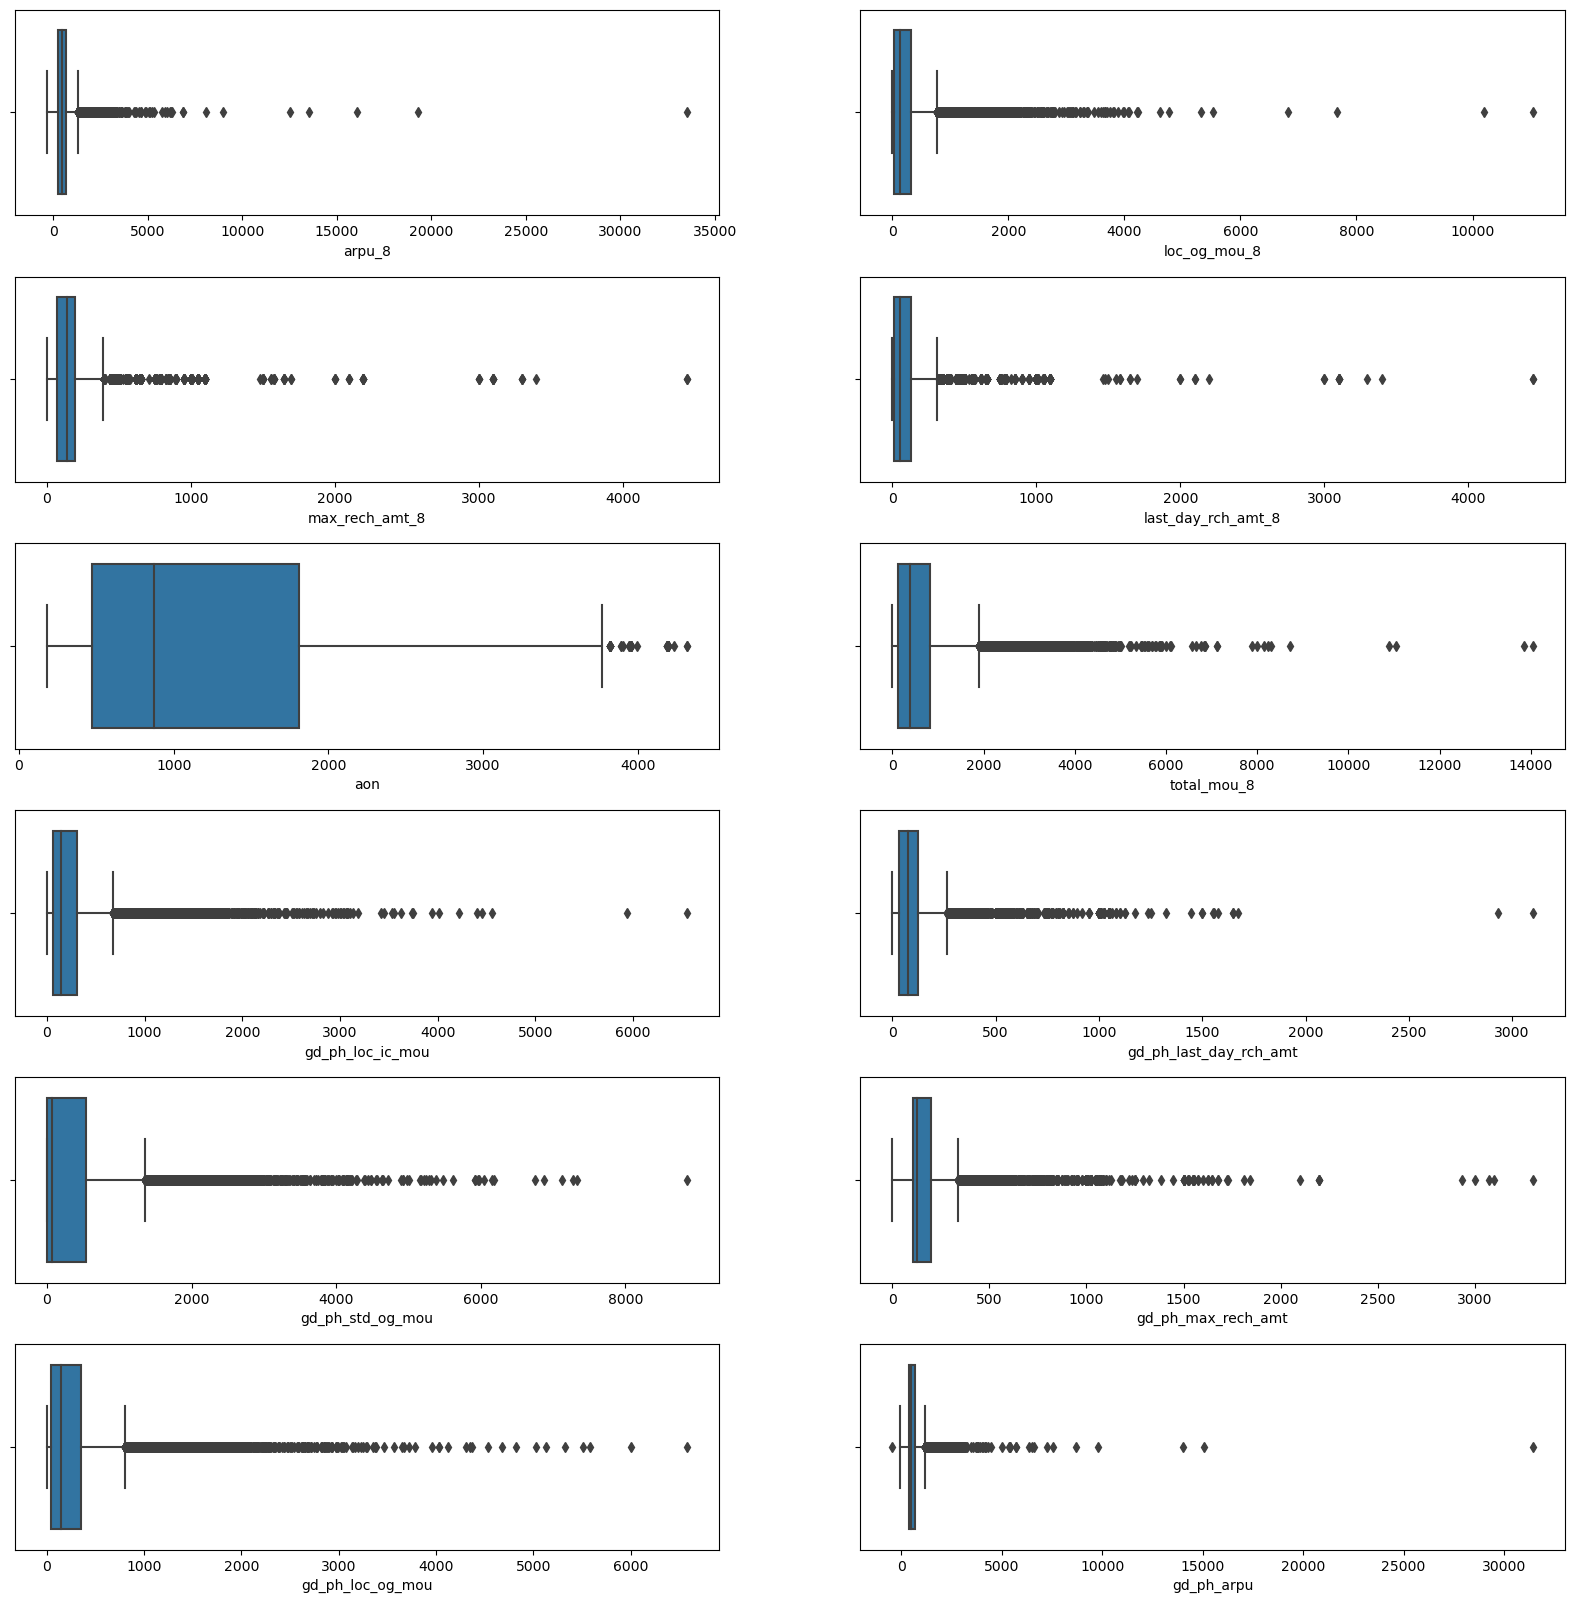

In [37]:
## check for the outliers in our dataset.
## from the above code cell we can see alot of columns have outliers let's list those columns and plot the boxplot for further examination.

outliers_cols = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'total_mou_8', 
               'gd_ph_loc_ic_mou', 'gd_ph_last_day_rch_amt', 'gd_ph_std_og_mou', 'gd_ph_max_rech_amt', 
              'gd_ph_loc_og_mou', 'gd_ph_arpu']


fig, axes = plt.subplots(6, 2, figsize=(20, 20))
for index, col in enumerate(outliers_cols):
    i, j = divmod(index, 2)
    sns.boxplot(data[col], ax=axes[i, j])
    
plt.subplots_adjust(hspace=0.3) 
plt.show()

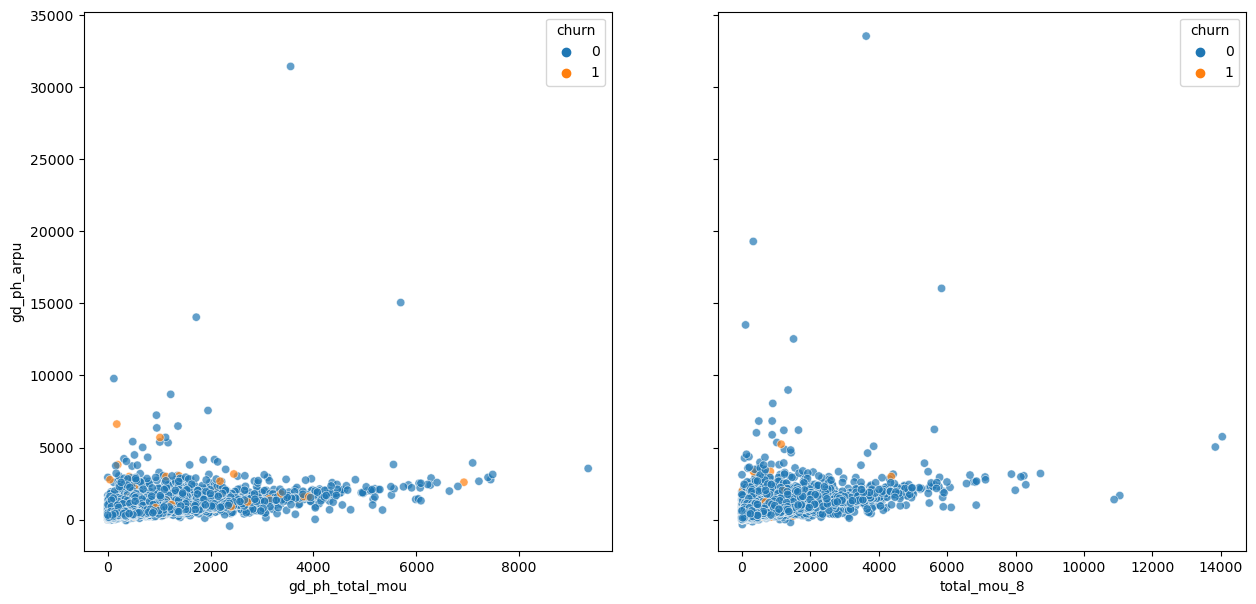

In [38]:
# Lets check how the VBC effects the revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_total_mou', data=data, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='arpu_8', x='total_mou_8', data=data, ax=axes[1], hue='churn', alpha=0.7)

plt.show()

## Insights :
1. We can clearly see that MOU have dropped significantly for the churners in the action phase, i.e. the eighth month, reducing the revenue generated by them.
2. It's also worth noting that, despite the fact that the MOU is between 0-2000, the revenue is highest in that range, indicating that these users had other services that were boosting revenue.

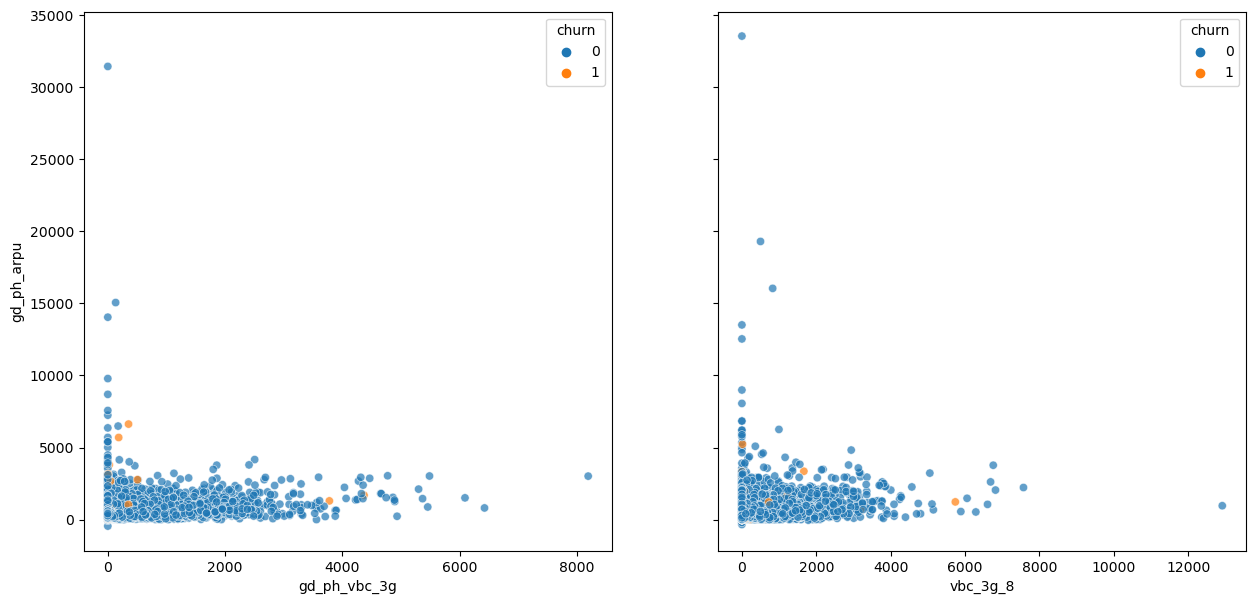

In [39]:
# Lets check how the total_mou effects the revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_vbc_3g', data=data, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='arpu_8', x='vbc_3g_8', data=data, ax=axes[1], hue='churn', alpha=0.7)
plt.show()

## Insights :
1. We can see that the users who used very little VBC data but generated a lot of revenue churned.
2. Once again, we see that revenue is higher on the lower consumption side.

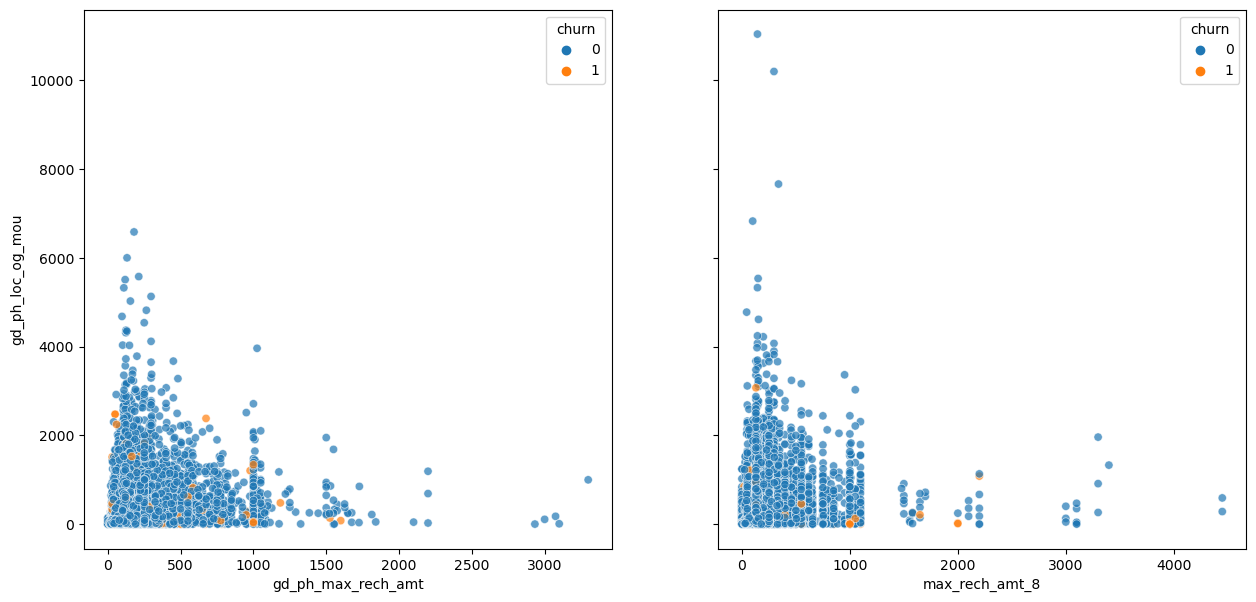

In [40]:
# Lets check the relation between recharge amount and local outgoing calls

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_loc_og_mou', data=data, ax=axes[0],
                hue='churn', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='loc_og_mou_8', data=data, ax=axes[1], hue='churn', alpha=0.7)
plt.show()

## Insights :

1. Users who recharged in large amounts used the service for local purposes less frequently than users who recharged in smaller amounts.
2. Users whose maximum recharge amount as well as local outgoing were low even during the good times churned more.

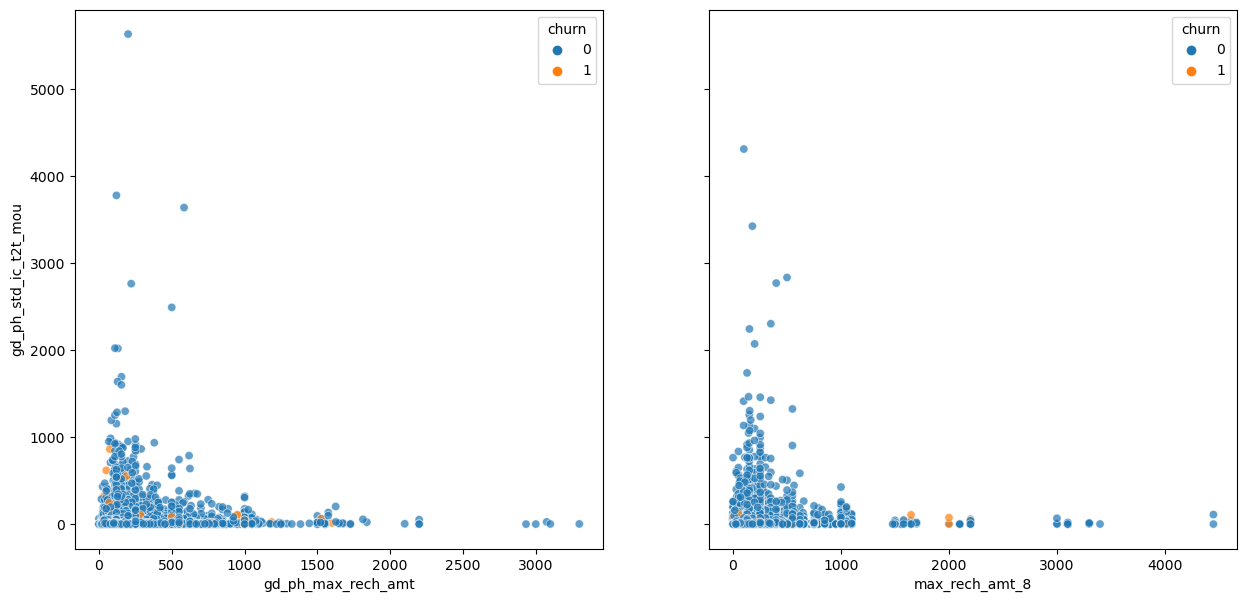

In [41]:
# Incoming from the same service provider vs the recharge amount

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_std_ic_t2t_mou', data=data, ax=axes[0],
                hue='churn', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='std_ic_t2t_mou_8', data=data, ax=axes[1], hue='churn', alpha=0.7)
plt.show()

## Insights:
Customers who had the highest recharge amount and still had a low incoming call mou during the good season churned out more calls.

In [42]:
## taking the targert variable chrun in varibale y and rest of the columns in varibale X.

y = data['churn']
X = data.drop('churn', axis=1)

In [43]:
## STANDARDIZATION

scaler = StandardScaler()
X[X.columns] =  scaler.fit_transform(X[X.columns])

In [44]:
## let's check the distribution of the target variable chrun 
data.churn.value_counts()

0    27295
1    868  
Name: churn, dtype: int64

In [45]:
## we can see that there is imbalce in our target variable hence we will use SMOTE to handle the class imbalance

sm = SMOTE(random_state = 50)
x_res, y_res = sm.fit_resample(X,y)

y_res.value_counts()

## Now we can say that our data is balanced and now we can move forward 

1    27295
0    27295
Name: churn, dtype: int64

In [46]:
## PRINCIPAL COMPONENT ANALYSIS

pca = PCA(n_components=20)
x_pca = pca.fit_transform(x_res)
x_pca.shape

(54590, 20)

### DATA MODELLING 

In [47]:
## First model will be LOGISTICS REGRESSION. 

## Splitting the data into test and train

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, train_size=0.7, test_size=0.3, random_state=20)


In [48]:
import statsmodels.api as sm

In [49]:
model1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38213
Model:                            GLM   Df Residuals:                    38157
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17620.
Date:                Mon, 13 Feb 2023   Deviance:                       35239.
Time:                        11:59:43   Pearson chi2:                 6.25e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3713
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.3968      0.022    -63.744      0.000      -1.440      -1.354
arpu_8                     0.3188      0.054      5.937      0.000       0.214       0.424
roam_ic_mou_8             -0.4366      0.036    -12.268      0.000      -0.506      -0.367
roam_og_mou_8              0.5903      0.269      2.195      0.028       0.063       1.117
loc_og_t2c_mou_8           0.1243      0.025      4.993      0.000       0.075       0.173
loc_og_mou_8               1.5670      0.911      1.720      0.085      -0.219       3.353
std_og_t2f_mou_8          -0.0763      0.039     -1.945      0.052      -0.153       0.001
std_og_mou_8               3.1240      1.523      2.051      0.040       0.139       6.109
isd_og_mou_8              -0.0041      0.110     -0.037      0.970      -0.219       0.211
spl_og_mou_8              -0.1360      0.053     -2.587      0.010      -0.239      -0.033
og_others_8                0.1041      0.027      3.881      0.000       0.052       0.157
loc_ic_mou_8              -1.5447      0.056    -27.429      0.000      -1.655      -1.434
std_ic_t2t_mou_8          -0.5952      0.066     -8.951      0.000      -0.725      -0.465
std_ic_t2f_mou_8          -0.1302      0.048     -2.702      0.007      -0.225      -0.036
std_ic_mou_8              -0.1199      0.046     -2.604      0.009      -0.210      -0.030
spl_ic_mou_8              -0.2891      0.023    -12.675      0.000      -0.334      -0.244
isd_ic_mou_8              -0.1667      0.029     -5.802      0.000      -0.223      -0.110
ic_others_8                0.1769      0.029      6.199      0.000       0.121       0.233
total_rech_num_8          -0.4586      0.034    -13.649      0.000      -0.524      -0.393
max_rech_amt_8             0.1842      0.024      7.677      0.000       0.137       0.231
last_day_rch_amt_8        -0.6196      0.024    -25.462      0.000      -0.667      -0.572
vol_2g_mb_8               -0.3135      0.030    -10.319      0.000      -0.373      -0.254
monthly_2g_8              -0.5703      0.028    -20.345      0.000      -0.625      -0.515
sachet_2g_8               -0.5714      0.030    -19.099      0.000      -0.630      -0.513
monthly_3g_8              -0.8689      0.038    -22.894      0.000      -0.943      -0.794
sachet_3g_8               -0.3395      0.034    -10.028      0.000      -0.406      -0.273
aon                       -0.4030      0.017    -23.955      0.000      -0.436      -0.370
total_mou_8               -4.3646      1.744     -2.502      0.012      -7.784      -0.946
gd_ph_loc_og_mou           1.2419      1.094      1.135      0.256      -0.903       3.387
gd_ph_std_ic_mou           0.0193      0.032      0.605      0.545      -0.043       0.082
gd_ph_monthly_2g          -0.1612      0.023     -6.909      0.000      -0.207  

In [50]:
## RFE for feature selection.

# Create LR object
reg = LogisticRegression(solver='liblinear')

rfe = RFE(reg, n_features_to_select=20)
rfe = rfe.fit(x_train, y_train)

In [51]:
rfe_col = X.columns[rfe.support_]
rfe_col

Index(['arpu_8', 'roam_ic_mou_8', 'std_og_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'aon', 'total_mou_8', 'gd_ph_total_mou',
       'gd_ph_total_rech_num', 'gd_ph_std_og_mou', 'gd_ph_loc_ic_mou',
       'gd_ph_vol_2g_mb', 'gd_ph_monthly_3g'],
      dtype='object')

In [52]:
x_train_sm = sm.add_constant(x_train[rfe_col])
model2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
model2.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38213
Model:                            GLM   Df Residuals:                    38192
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18069.
Date:                Mon, 13 Feb 2023   Deviance:                       36139.
Time:                        12:00:37   Pearson chi2:                 7.69e+06
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3563
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.2869      0.021    -62.266      0.000      -1.327      -1.246
arpu_8                   0.4818      0.031     15.548      0.000       0.421       0.542
roam_ic_mou_8           -0.2319      0.023     -9.971      0.000      -0.277      -0.186
std_og_mou_8             0.3685      0.068      5.395      0.000       0.235       0.502
loc_ic_mou_8            -1.6428      0.053    -30.838      0.000      -1.747      -1.538
std_ic_t2t_mou_8        -0.3744      0.041     -9.082      0.000      -0.455      -0.294
spl_ic_mou_8            -0.3042      0.023    -13.405      0.000      -0.349      -0.260
total_rech_num_8        -0.6373      0.031    -20.364      0.000      -0.699      -0.576
last_day_rch_amt_8      -0.5652      0.024    -23.965      0.000      -0.611      -0.519
vol_2g_mb_8             -0.2879      0.030     -9.566      0.000      -0.347      -0.229
monthly_2g_8            -0.6664      0.024    -27.313      0.000      -0.714      -0.619
sachet_2g_8             -0.4574      0.022    -20.333      0.000      -0.502      -0.413
monthly_3g_8            -0.8716      0.034    -25.430      0.000      -0.939      -0.804
aon                     -0.3947      0.016    -24.301      0.000      -0.427      -0.363
total_mou_8             -1.2224      0.077    -15.906      0.000      -1.373      -1.072
gd_ph_total_mou          0.6352      0.052     12.134      0.000       0.533       0.738
gd_ph_total_rech_num     0.3495      0.023     15.184      0.000       0.304       0.395
gd_ph_std_og_mou        -0.2797      0.049     -5.675      0.000      -0.376      -0.183
gd_ph_loc_ic_mou         0.7375      0.038     19.488      0.000       0.663       0.812
gd_ph_vol_2g_mb          0.2226      0.019     11.453      0.000       0.184       0.261
gd_ph_monthly_3g         0.2691      0.023     11.782      0.000       0.224       0.314
========================================================================================
"""

In [53]:
res = model2.fit()
y_train_pred = res.predict(x_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.020793,0
1,1,0.610749,1
2,1,0.843034,1
3,0,0.189538,0
4,1,0.937987,1


In [54]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14648  4405]
 [ 3466 15694]]

Accuracy : 0.7940229764739748


In [55]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(x_train[rfe_col].values, i) for i in range(x_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,total_mou_8,13.45
14,gd_ph_total_mou,11.66
16,gd_ph_std_og_mou,11.32
2,std_og_mou_8,10.43
3,loc_ic_mou_8,3.53
17,gd_ph_loc_ic_mou,3.19
6,total_rech_num_8,3.02
0,arpu_8,2.86
15,gd_ph_total_rech_num,2.31
11,monthly_3g_8,1.89


#### We can see that the VIF for total_mou_8 is very high hence we will drop it

In [56]:
rfe_col = rfe_col.drop('total_mou_8', 1)


In [57]:
x_train_sm = sm.add_constant(x_train[rfe_col])
model3 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res2 = model3.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38213
Model:                            GLM   Df Residuals:                    38193
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18219.
Date:                Mon, 13 Feb 2023   Deviance:                       36438.
Time:                        12:00:38   Pearson chi2:                 1.78e+07
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3513
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.2677      0.021    -61.785      0.000      -1.308      -1.228
arpu_8                   0.3249      0.028     11.574      0.000       0.270       0.380
roam_ic_mou_8           -0.2816      0.023    -12.215      0.000      -0.327      -0.236
std_og_mou_8            -0.5917      0.031    -19.210      0.000      -0.652      -0.531
loc_ic_mou_8            -1.9019      0.051    -37.231      0.000      -2.002      -1.802
std_ic_t2t_mou_8        -0.3585      0.041     -8.828      0.000      -0.438      -0.279
spl_ic_mou_8            -0.3012      0.023    -13.287      0.000      -0.346      -0.257
total_rech_num_8        -0.7414      0.031    -23.862      0.000      -0.802      -0.681
last_day_rch_amt_8      -0.5398      0.023    -23.098      0.000      -0.586      -0.494
vol_2g_mb_8             -0.2828      0.030     -9.382      0.000      -0.342      -0.224
monthly_2g_8            -0.6645      0.024    -27.232      0.000      -0.712      -0.617
sachet_2g_8             -0.4452      0.023    -19.734      0.000      -0.489      -0.401
monthly_3g_8            -0.8472      0.034    -24.853      0.000      -0.914      -0.780
aon                     -0.3928      0.016    -24.409      0.000      -0.424      -0.361
gd_ph_total_mou          0.0179      0.033      0.546      0.585      -0.046       0.082
gd_ph_total_rech_num     0.4327      0.023     18.988      0.000       0.388       0.477
gd_ph_std_og_mou         0.2365      0.035      6.724      0.000       0.168       0.305
gd_ph_loc_ic_mou         0.8618      0.037     23.374      0.000       0.790       0.934
gd_ph_vol_2g_mb          0.2207      0.019     11.336      0.000       0.183       0.259
gd_ph_monthly_3g         0.2784      0.023     12.240      0.000       0.234       0.323
========================================================================================
"""

In [58]:
y_train_pred = res2.predict(x_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.019849,0
1,1,0.605109,1
2,1,0.842405,1
3,0,0.187675,0
4,1,0.937997,1


In [59]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14585  4468]
 [ 3553 15607]]

Accuracy : 0.7900976107607359


In [60]:
vif = pd.DataFrame()
vif['Features'] = x_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(x_train[rfe_col].values, i) for i in range(x_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,gd_ph_std_og_mou,6.96
13,gd_ph_total_mou,6.08
3,loc_ic_mou_8,3.20
16,gd_ph_loc_ic_mou,3.06
6,total_rech_num_8,2.92
2,std_og_mou_8,2.65
0,arpu_8,2.64
14,gd_ph_total_rech_num,2.22
11,monthly_3g_8,1.89
8,vol_2g_mb_8,1.83


#### We can see that the VIF for gd_ph_std_og_mou is very high hence we will drop it

In [61]:
rfe_col = rfe_col.drop('gd_ph_std_og_mou', 1)


In [62]:
x_train_sm = sm.add_constant(x_train[rfe_col])
model4 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res3 = model4.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38213
Model:                            GLM   Df Residuals:                    38194
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18242.
Date:                Mon, 13 Feb 2023   Deviance:                       36484.
Time:                        12:00:41   Pearson chi2:                 2.04e+07
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3505
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.2764      0.021    -62.023      0.000      -1.317      -1.236
arpu_8                   0.2821      0.027     10.397      0.000       0.229       0.335
roam_ic_mou_8           -0.2824      0.023    -12.297      0.000      -0.327      -0.237
std_og_mou_8            -0.4866      0.026    -18.788      0.000      -0.537      -0.436
loc_ic_mou_8            -1.9502      0.051    -38.237      0.000      -2.050      -1.850
std_ic_t2t_mou_8        -0.3520      0.040     -8.701      0.000      -0.431      -0.273
spl_ic_mou_8            -0.2984      0.023    -13.188      0.000      -0.343      -0.254
total_rech_num_8        -0.7607      0.031    -24.578      0.000      -0.821      -0.700
last_day_rch_amt_8      -0.5493      0.024    -23.363      0.000      -0.595      -0.503
vol_2g_mb_8             -0.2779      0.030     -9.240      0.000      -0.337      -0.219
monthly_2g_8            -0.6605      0.024    -27.030      0.000      -0.708      -0.613
sachet_2g_8             -0.4433      0.023    -19.625      0.000      -0.488      -0.399
monthly_3g_8            -0.8378      0.034    -24.586      0.000      -0.905      -0.771
aon                     -0.3986      0.016    -24.755      0.000      -0.430      -0.367
gd_ph_total_mou          0.1939      0.020      9.739      0.000       0.155       0.233
gd_ph_total_rech_num     0.4501      0.023     19.888      0.000       0.406       0.494
gd_ph_loc_ic_mou         0.8340      0.037     22.664      0.000       0.762       0.906
gd_ph_vol_2g_mb          0.2172      0.019     11.161      0.000       0.179       0.255
gd_ph_monthly_3g         0.2795      0.023     12.267      0.000       0.235       0.324
========================================================================================
"""

In [63]:
y_train_pred = res3.predict(x_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.019993,0
1,1,0.606042,1
2,1,0.847003,1
3,0,0.182193,0
4,1,0.928512,1


In [64]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14552  4501]
 [ 3532 15628]]

Accuracy : 0.7897835815036768


In [65]:
vif = pd.DataFrame()
vif['Features'] = x_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(x_train[rfe_col].values, i) for i in range(x_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_ic_mou_8,3.20
15,gd_ph_loc_ic_mou,2.89
6,total_rech_num_8,2.88
0,arpu_8,2.46
14,gd_ph_total_rech_num,2.19
2,std_og_mou_8,2.14
13,gd_ph_total_mou,2.01
11,monthly_3g_8,1.88
8,vol_2g_mb_8,1.83
17,gd_ph_monthly_3g,1.80


### Now the vif score looks sorted, we can further go with this data for modelling 

In [66]:
## Confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [67]:
print(f' sensitivity :{TP / float(TP+FN)}')
print(f' sensitivity : {TN / float(TN+FP)}')


 sensitivity :0.8156576200417537
 sensitivity : 0.7637642366031596


In [68]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

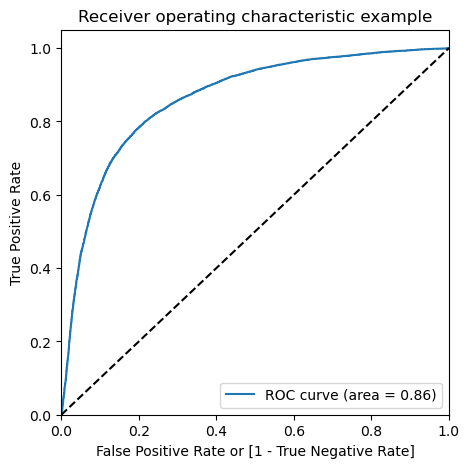

In [69]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [70]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.019993,0,1,0,0,0,0,0,0,0,0,0
1,1,0.606042,1,1,1,1,1,1,1,1,0,0,0
2,1,0.847003,1,1,1,1,1,1,1,1,1,1,0
3,0,0.182193,0,1,1,0,0,0,0,0,0,0,0
4,1,0.928512,1,1,1,1,1,1,1,1,1,1,1


In [71]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5, 0.5, 0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.501400  1.000000  0.000000
0.1  0.1   0.624107  0.978392  0.267832
0.2  0.2   0.693455  0.955585  0.429854
0.3  0.3   0.742784  0.922077  0.562484
0.4  0.4   0.770418  0.872704  0.667559
0.5  0.5   0.789784  0.815658  0.763764
0.6  0.6   0.787716  0.731367  0.844381
0.7  0.7   0.756156  0.607463  0.905684
0.8  0.8   0.687672  0.424582  0.952238
0.9  0.9   0.552116  0.119937  0.986721


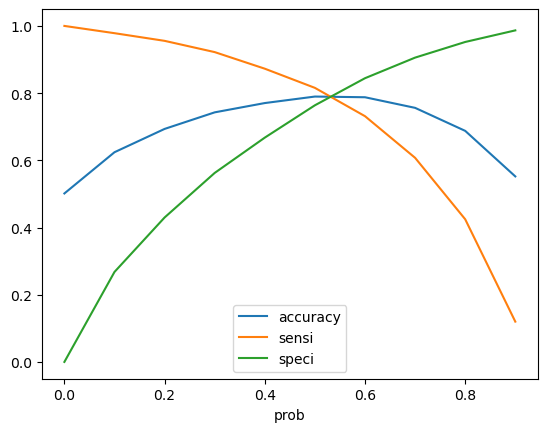

In [72]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [73]:
x_test = x_test[rfe_col]
X_test_sm = sm.add_constant(x_test)

y_test_pred = res3.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
22820,0,0.952427,1
3190,0,0.085286,0
30977,1,0.767656,1
51693,1,0.375258,0
35907,1,0.788820,1


In [74]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)}')

[[6298 1944]
 [1468 6667]]

Accuracy : 0.7916590340111131


### INSIGHTS :
1. We get an accuracy of 78.5% on train data and 78.8% on test data using logistic regression.
2. We can clearly see that the majority of the critical features are from the action phase, which corresponds to the business understanding that the action phase requires more attention.

## DECISION TREE

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y_res, train_size=0.7, random_state=20)

In [76]:
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(x_train, y_train)

# Train Accuracy
y_train_pred = intial_dt.predict(x_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = intial_dt.predict(x_test)

# Print the report on test data
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.8727919817863031
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      8242
           1       0.81      0.88      0.84      8135

    accuracy                           0.84     16377
   macro avg       0.84      0.84      0.84     16377
weighted avg       0.84      0.84      0.84     16377



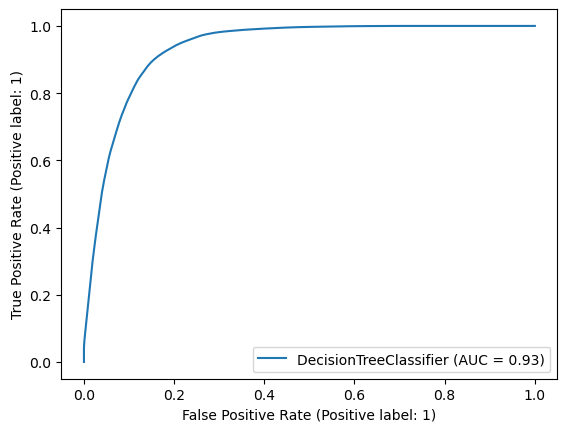

In [77]:
plot_roc_curve(intial_dt, x_train, y_train, drop_intermediate=False)
plt.show()

In [78]:

dt = DecisionTreeClassifier(random_state=42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Perform gridsearch
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [79]:
grid_search.best_score_


0.8846466243513349

In [80]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=50, random_state=42)

In [81]:
y_train_pred = dt_best.predict(x_train)
y_test_pred = dt_best.predict(x_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      8242
           1       0.88      0.92      0.90      8135

    accuracy                           0.90     16377
   macro avg       0.90      0.90      0.90     16377
weighted avg       0.90      0.90      0.90     16377



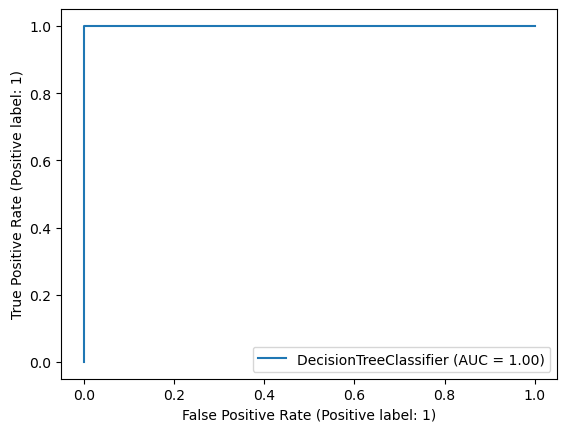

In [82]:
plot_roc_curve(dt_best, x_train, y_train)
plt.show()

## Random Forest

Train accuracy : 0.8727919817863031
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      8242
           1       0.87      0.93      0.90      8135

    accuracy                           0.89     16377
   macro avg       0.89      0.89      0.89     16377
weighted avg       0.89      0.89      0.89     16377



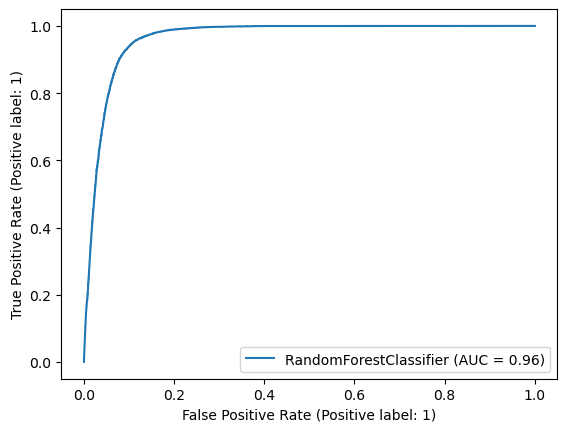

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)

# Train Accuracy
y_train_pred = intial_dt.predict(x_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf.predict(x_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

# Plotting ROC
plot_roc_curve(rf, x_train, y_train)
plt.show()

In [84]:
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [85]:
grid_search.best_score_

0.9386858127703358

In [86]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [87]:
y_train_pred = rf_best.predict(x_train)
y_test_pred = rf_best.predict(x_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      8242
           1       0.93      0.96      0.95      8135

    accuracy                           0.95     16377
   macro avg       0.95      0.95      0.95     16377
weighted avg       0.95      0.95      0.95     16377



#### We are getting an accuracy of 95% on test data, with Random forest

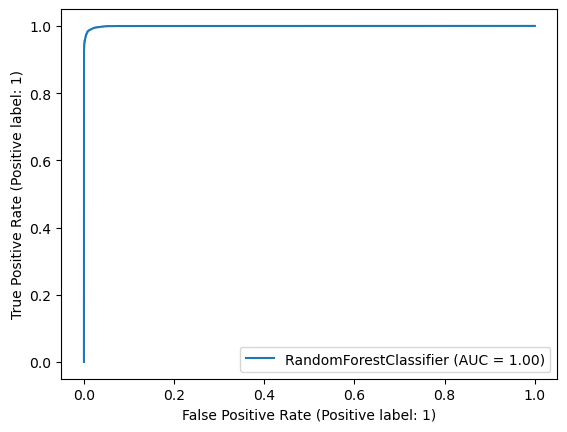

In [88]:
plot_roc_curve(rf_best, x_train, y_train)
plt.show()

## Conclusions 

-Given our company's problem, we need better recall to keep their customers. We need to have a high rate of correctly identifying the true positives, thus recall, as providing an offer to a user who will not churn will cost less than losing a customer and bringing in new customers.

-When we compare the trained models, we see that tuned random forest, with highest accuracy and recall of 95 percent. Therefore, since random forest is comparably simpler than others, we will employ it.

In [89]:
final_model = RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [90]:
y_train_pred = rf_best.predict(x_train)
y_test_pred = rf_best.predict(x_test)



# Print the report
print("Report on train data")
print(metrics.classification_report(y_train, y_train_pred))

print("Report on test data")
print(metrics.classification_report(y_test, y_test_pred))

Report on train data
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     19053
           1       0.98      0.99      0.99     19160

    accuracy                           0.99     38213
   macro avg       0.99      0.99      0.99     38213
weighted avg       0.99      0.99      0.99     38213

Report on test data
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      8242
           1       0.93      0.96      0.95      8135

    accuracy                           0.95     16377
   macro avg       0.95      0.95      0.95     16377
weighted avg       0.95      0.95      0.95     16377



### Strategies to Manage Customer Churn

1. Several of the factors we noticed while performing Exploratory data analysis that can be combined with these insights are:

2. Customers whose maximum recharge amount is less than 200, even in good times, should be tagged and re-evaluated on a regular basis because they are more likely to churn.

3. Customers who have been with the network for less than 4 years should be examined on a regular basis, as data shows that users who have been with the network for less than 4 years churn more frequently.

4. MOU is one of the main factors, but data, particularly VBC if indeed the user is not using a data pack, is another factor to consider.